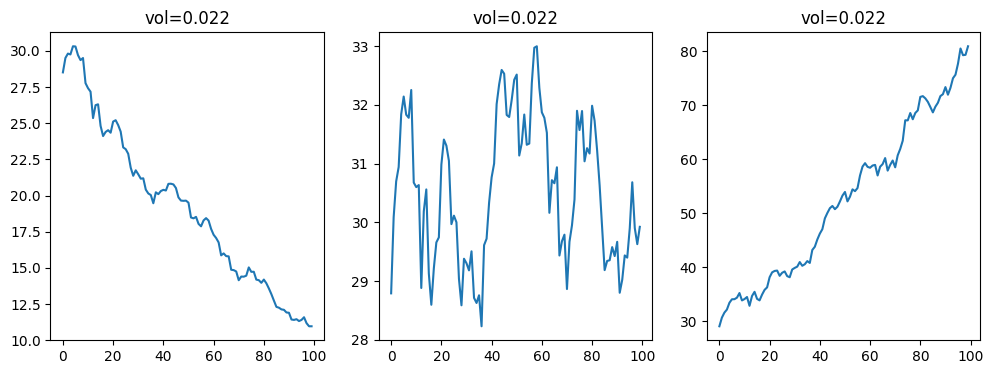

In [1]:
import numpy as np
import matplotlib.pyplot as plt

returns = np.random.normal(0, 0.02, size=100)

fig, axes = plt.subplots(1, 3, figsize=(12,4))
c0 = np.random.randint(5, 50)

for i, alpha in enumerate((-0.01, 0, 0.01)):
    r = returns + alpha
    close = np.cumprod(1 + r) * c0
    vol = round(np.std(r), 3)
    axes[i].set_title(f"vol={vol}")
    axes[i].plot(close)

In [1]:
import numpy as np
import pandas as pd
from utils import get_secs, get_bars
from coretypes import FrameType
import datetime

from coursea import *
await init()

result = []
for symbol, name, _ in get_secs():
    bars = get_bars(symbol, 24, FrameType.MONTH, end=datetime.date(2024, 4, 18))
    if len(bars) < 24:
        continue

    close = bars["close"][-24:]
    returns = close[1:]/close[:-1] - 1
    vol = np.std(returns)
    result.append((name, symbol, vol))

df = pd.DataFrame(result, columns=["code", "vol"])
df.nsmallest(20, "vol")

2024-04-21 23:02:30,635 I 914170 cfg4py.core:update_config:280 | configuration is
alpha: {data_home: ~/zillionare/alpha/data, tts_server: 'http://127.0.0.1:5002/api/tts?'}
backtest: {url: 'http://192.168.100.114:7080/backtest/api/trade/v0.5/'}
influxdb: {bucket_name: zillionare, enable_compress: true, max_query_size: 5000, org: zillionare,
  token: hwxHycJfp_t6bCOYe2MhEDW4QBOO4FDtgeBWnPR6bGZJGEZ_41m_OHtTJFZKyD2HsbVqkZM8rJNkMvjyoXCG6Q==,
  url: 'http://192.168.100.101:58086'}
notify: {dingtalk_access_token: 58df072143b52368086736cb38236753073ccde6537650cad1d5567747803563,
  keyword: trader}
pluto: {store: ~/zillionare/pluto/store}
redis: {dsn: 'redis://192.168.100.101:56379'}
tasks: {pooling: false, wr: false}

2024-04-21 23:02:30,643 I 914170 /home/aaron/miniconda3/envs/coursea/lib/python3.8/site-packages/omicron/dal/cache.py:init:94 | init redis cache...
2024-04-21 23:02:30,654 I 914170 /home/aaron/miniconda3/envs/coursea/lib/python3.8/site-packages/omicron/dal/cache.py:init:124 | red

init securities done


KeyError: "None of [Index(['frame', 'open', 'high', 'low', 'close', 'volume', 'amount', 'turnover',\n       'pct'],\n      dtype='object')] are in the [columns]"